### Import code


In [23]:
import numpy as np

### Question 1

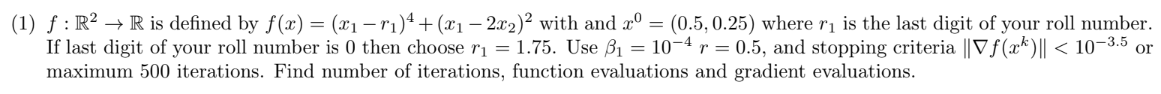


In [24]:
# Define the fucntion given
def f(x, r1):
    return (x[0] - r1)**4 + (x[0] - 2*x[1])**2

# Define the fucntion which gives the gradient
def gradient_f(x, r1):
    dx1 = 4*(x[0] - r1)**3 + 2*(x[0] - 2*x[1])
    dx2 = -4*(x[0] - 2*x[1])
    return np.array([dx1, dx2])


# Define the backtrack function to get the exact alpha 
def backtrack_function(f, grad_f, x, d, r1, alpha=1.0, c1=1e-4, c2=0.9, max_iter=25):
    phi = lambda alpha: f(x + alpha * d, r1)
    dphi = lambda alpha: np.dot(grad_f(x + alpha * d, r1), d)
    
    phi_0 = phi(0)
    dphi_0 = dphi(0)
    
    for _ in range(max_iter):
        if phi(alpha) <= phi_0 + c1 * alpha * dphi_0 and dphi(alpha) >= c2 * dphi_0:
            return alpha
        alpha *= 0.5
    
    return alpha


# Define the gradient descent method to get optimal number of iterations
def descent_method(x0, r1, beta1, r, epsilon, max_iter):
    x = x0
    iter_count = 0
    func_evals = 0
    grad_evals = 0
    
    while iter_count < max_iter:
        grad = gradient_f(x, r1)
        grad_norm = np.linalg.norm(grad)
        
        if grad_norm < epsilon:
            break
        
        d = -grad
        alpha = backtrack_function(f, gradient_f, x, d, r1)
        
        x = x + alpha * d
        beta1 *= r
        
        iter_count += 1
        func_evals += 1   
        grad_evals += 1   
    
    return x, iter_count, func_evals, grad_evals

# Parameters
r1 = 8   # Last digit of roll number which is B21CS098 
x0 = np.array([0.5, 0.25])
beta1 = 1e-4
r = 0.5
epsilon = 10**(-3.5)
max_iter = 500

# Run the descent method
result, iterations, func_evals, grad_evals = descent_method(x0, r1, beta1, r, epsilon, max_iter)

print(f"iteration count: {iterations}")
print(f"function evaluations count: {func_evals}")
print(f"gradient evaluations count: {grad_evals}")
print(f"Final solution: {result}")
print(f"Final function value: {f(result, r1)}")
print(f"Final gradient norm: {np.linalg.norm(gradient_f(result, r1))}")

iteration count: 312
function evaluations count: 312
gradient evaluations count: 312
Final solution: [7.95852271 3.97922636]
Final function value: 2.964555353327943e-06
Final gradient norm: 0.00031548085987741394


### Question 2

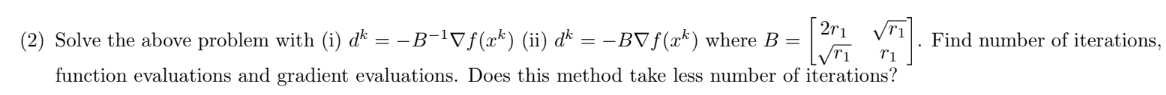


In [25]:
# Define the function given same as the first question
def f(x, r1):
    return (x[0] - r1)**4 + (x[0] - 2*x[1])**2

# Define the gradient of the given function w.r.t X1 and X2
def gradient_f(x, r1):
    dx1 = 4*(x[0] - r1)**3 + 2*(x[0] - 2*x[1])
    dx2 = -4*(x[0] - 2*x[1])
    return np.array([dx1, dx2])


# Define the backtrack fucntion
def backtrack_function(f, grad_f, x, d, r1, alpha=1.0, c1=1e-4, c2=0.9, max_iter=25):
    phi = lambda alpha: f(x + alpha * d, r1)
    dphi = lambda alpha: np.dot(grad_f(x + alpha * d, r1), d)
    
    phi_0 = phi(0)
    dphi_0 = dphi(0)
    
    for _ in range(max_iter):
        if phi(alpha) <= phi_0 + c1 * alpha * dphi_0 and dphi(alpha) >= c2 * dphi_0:
            return alpha
        alpha *= 0.5
    
    return alpha


# Define the descent method
def descent_method(x0, r1, beta1, r, epsilon, max_iter, method):
    x = x0
    iter_count = 0
    func_evals = 0
    grad_evals = 0
    
    B = np.array([[2*r1, np.sqrt(r1)], [np.sqrt(r1), r1]])
    B_inv = np.linalg.inv(B)
    
    while iter_count < max_iter:
        grad = gradient_f(x, r1)
        grad_norm = np.linalg.norm(grad)
        
        if grad_norm < epsilon:
            break
        
        if method == 'B_inv':
            d = -np.dot(B_inv, grad)
        elif method == 'B':
            d = -np.dot(B, grad)
        
        alpha = backtrack_function(f, gradient_f, x, d, r1)
        
        x = x + alpha * d
        beta1 *= r
        
        iter_count += 1
        func_evals += 1   
        grad_evals += 1   
    
    return x, iter_count, func_evals, grad_evals


# Parameters
r1 = 8  # Last digit of roll number
x0 = np.array([0.5, 0.25])
beta1 = 1e-4
r = 0.5
epsilon = 10**(-3.5)
max_iter = 20000

# Run the descent method with B^(-1)
result_B_inv, iterations_B_inv, func_evals_B_inv, grad_evals_B_inv = descent_method(x0, r1, beta1, r, epsilon, max_iter, 'B_inv')

print("Results for d^k = -B^(-1)∇f(x^k):")
print(f"iteration count: {iterations_B_inv}")



print("\n" + "="*50 + "\n")

# Run the descent method with B
result_B, iterations_B, func_evals_B, grad_evals_B = descent_method(x0, r1, beta1, r, epsilon, max_iter, 'B')

print("Results for d^k = -B∇f(x^k):")
print(f"iteration count: {iterations_B}")

print("\n" + "="*50 + "\n")

print("Comparison:")
print(f"B^(-1) method takes {'less' if iterations_B_inv < iterations_B else 'more'} iterations than B method.")

Results for d^k = -B^(-1)∇f(x^k):
iteration count: 20000


Results for d^k = -B∇f(x^k):
iteration count: 102


Comparison:
B^(-1) method takes more iterations than B method.


### Question 3

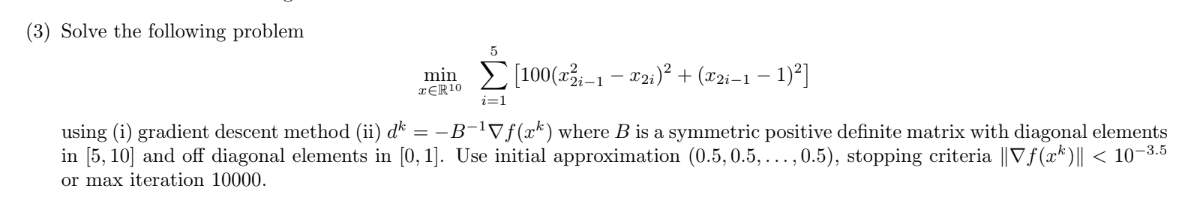


In [26]:
# Define the given function 
def function(x):
    return sum(100 * (x[2*i+1] - x[2*i]**2)**2 + (1 - x[2*i])**2 for i in range(5))

# Define the gradient of the given function w.r.t X1 and X2
def function_gradient(x):
    grad = np.zeros_like(x)
    for i in range(5):
        grad[2*i] = -400 * x[2*i] * (x[2*i+1] - x[2*i]**2) - 2 * (1 - x[2*i])
        grad[2*i+1] = 200 * (x[2*i+1] - x[2*i]**2)
    return grad

# Define the fn to generate the matrix as define in the question
def generate_matrix():
    B = np.random.uniform(0, 1, (10, 10))
    B = (B + B.T) / 2   
    B += np.diag(np.random.uniform(5, 10, 10))   
    return B


# Define the backtrack function to get the alpha
def backtrack_function(f, grad_f, x, d, alpha=1.0, c1=1e-4, c2=0.9, max_iter=25):
    phi = lambda alpha: f(x + alpha * d)
    dphi = lambda alpha: np.dot(grad_f(x + alpha * d), d)
    
    phi_0 = phi(0)
    dphi_0 = dphi(0)
    
    for _ in range(max_iter):
        if phi(alpha) <= phi_0 + c1 * alpha * dphi_0 and dphi(alpha) >= c2 * dphi_0:
            return alpha
        alpha *= 0.5
    
    return alpha


# Define the descent function to find the optimized number of iterations
def descent_function(method, max_iter=20000, epsilon=10**(-3.5)):
    x = np.full(10, 0.5)
    B = generate_matrix() if method == 'B_inv' else None
    B_inv = np.linalg.inv(B) if method == 'B_inv' else None
    
    for iter in range(max_iter):
        grad = function_gradient(x)
        
        if np.linalg.norm(grad) < epsilon:
            break
        
        if method == 'gradient':
            d = -grad
        elif method == 'B_inv':
            d = -np.dot(B_inv, grad)
        
        alpha = backtrack_function(function, function_gradient, x, d)
        x = x + alpha * d
    
    return x, iter + 1, function(x)

# Gradient Descent
x_grad, iters_grad, f_grad = descent_function('gradient')
print("Gradient Descent Method:")
print(f"Iterations: {iters_grad}")
print(f"Final function value: {f_grad}")


print("\n" + "="*50 + "\n")

# B^(-1) Method
x_B_inv, iters_B_inv, f_B_inv = descent_function('B_inv')
print("B^(-1) Method:")
print(f"Iterations: {iters_B_inv}")
print(f"Final function value: {f_B_inv}")


print("\n" + "="*50 + "\n")

print("Comparison:")
print(f"Gradient Descent took {iters_grad} iterations")
print(f"B^(-1) Method took {iters_B_inv} iterations")
print(f"The {'Gradient Descent' if iters_grad < iters_B_inv else 'B^(-1) Method'} converged faster.")

Gradient Descent Method:
Iterations: 8596
Final function value: 6.153469162341308e-08


B^(-1) Method:
Iterations: 9714
Final function value: 1.153687676924516e-07


Comparison:
Gradient Descent took 8596 iterations
B^(-1) Method took 9714 iterations
The Gradient Descent converged faster.


### Question 4

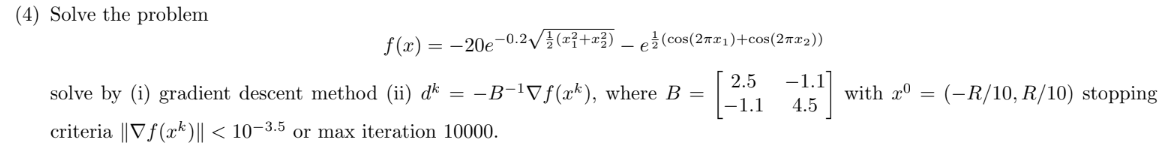


In [27]:
# Define the given function as mentioned in the question
def f(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2*np.pi*x[0]) + np.cos(2*np.pi*x[1])))


# Define the gradient function to calculate gradient w.r.t X1 and X2
def gradient_f(x):
    term1 = 20 * 0.2 * 0.5 / np.sqrt(0.5 * (x[0]**2 + x[1]**2)) * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2)))
    term2 = 0.5 * np.exp(0.5 * (np.cos(2*np.pi*x[0]) + np.cos(2*np.pi*x[1])))
    
    dx1 = term1 * x[0] + term2 * 2*np.pi * np.sin(2*np.pi*x[0])
    dx2 = term1 * x[1] + term2 * 2*np.pi * np.sin(2*np.pi*x[1])
    
    return np.array([dx1, dx2])

# Define the backtrack fn to get the optimal alpha
def backtrack_function(f, grad_f, x, d, alpha=1.0, c1=1e-4, c2=0.9, max_iter=25):
    phi = lambda alpha: f(x + alpha * d)
    dphi = lambda alpha: np.dot(grad_f(x + alpha * d), d)
    
    phi_0 = phi(0)
    dphi_0 = dphi(0)
    
    for _ in range(max_iter):
        if phi(alpha) <= phi_0 + c1 * alpha * dphi_0 and dphi(alpha) >= c2 * dphi_0:
            return alpha
        alpha *= 0.5
    
    return alpha


# Define the descent fn to get the optmized value
def descent_function(method, x0, B, max_iter=20000, epsilon=10**(-3.5)):
    x = x0
    B_inv = np.linalg.inv(B) if method == 'B_inv' else None
    
    for iter in range(max_iter):
        grad = gradient_f(x)
        
        if np.linalg.norm(grad) < epsilon:
            break
        
        if method == 'gradient':
            d = -grad
        elif method == 'B_inv':
            d = -np.dot(B_inv, grad)
        
        alpha = backtrack_function(f, gradient_f, x, d)
        x = x + alpha * d
    
    return x, iter + 1, f(x)

# Parameters
R = 98    # Last two digit of roll number (B21CS098)
x0 = np.array([-R/10, R/10])
B = np.array([[2.5, -1.1], [-1.1, 4.5]])

# Gradient Descent
x_grad, iters_grad, f_grad = descent_function('gradient', x0, B)
print("Gradient Descent Method:")
print(f"Iterations: {iters_grad}")
print(f"Final function value: {f_grad}")


print("\n" + "="*50 + "\n")

# B^(-1) Method
x_B_inv, iters_B_inv, f_B_inv = descent_function('B_inv', x0, B)
print("B^(-1) Method:")
print(f"Iterations: {iters_B_inv}")
print(f"Final function value: {f_B_inv}")


print("\n" + "="*50 + "\n")

print("Comparison:")
print(f"Gradient Descent took {iters_grad} iterations")
print(f"B^(-1) Method took {iters_B_inv} iterations")
print(f"The {'Gradient Descent' if iters_grad < iters_B_inv else 'B^(-1) Method'} converged faster.")

Gradient Descent Method:
Iterations: 20
Final function value: -6.759257793602058


B^(-1) Method:
Iterations: 25
Final function value: -5.426354725172603


Comparison:
Gradient Descent took 20 iterations
B^(-1) Method took 25 iterations
The Gradient Descent converged faster.
